In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Extracción de datos

columna1 = []
columna2 = []
columna3 = []

with open('c:/Users/ximen/Desktop/Practicas DFI/hub_data_3.txt', 'r') as archivo:
    # Lee cada línea del archivo
    for linea in archivo: #cada linea es una fila del texto
        elementos = linea.split() # divide la línea en sus elementos utilizando espacios como delimitadores
        #print(elementos)
        columna1.append(elementos[0]) # Agrega cada elemento a su respectiva columna
        columna2.append(elementos[1])
        columna3.append(elementos[2])

z = np.zeros(len(columna1))
for i in range(len(columna1)):
  z[i] = float(columna1[i])

H = np.zeros(len(columna2))
for i in range(len(columna2)):
  H[i] = float(columna2[i])

desv = np.zeros(len(columna3))
for i in range(len(columna3)):
  desv[i] = float(columna3[i])

836.5306594316623 -420.8897912123697 202.57057756205836
-503.9385882023071 662.0460115154126 -44.50433744643442
172.79420353607793 128.93189434063675 130.6719288466104
-252.05996792358667 -688.2577958816807 -867.4660139308663
-698.7209914306098 707.1083476856159 -615.3771430064805
186.5568994683665 -433.977149248503 -767.24207080206
-273.1257200301868 741.7847286499386 212.5493746661898
657.6263148484065 -367.6695214777874 792.5276039631428
45.778052345921196 -55.42104449878798 -415.5095173880354
-589.7602222967305 -123.94897452818145 -464.41672462470615
-435.20102865553076 -129.98969838132734 -400.0182563907622
803.3780405175421 -54.338307793810486 -948.7928907744381
-33.21532928024044 -879.3401324655968 6.56272674481545
232.15834945387337 -936.6292009642125 -101.20254415418503
-608.6126954303729 885.1815088123565 29.143881238712083
-886.3513201900628 -959.3086294907664 -89.05757124513843
142.31161289539205 -847.7711804726964 -545.8321317774521
-940.8835125333778 335.144874744562 359.

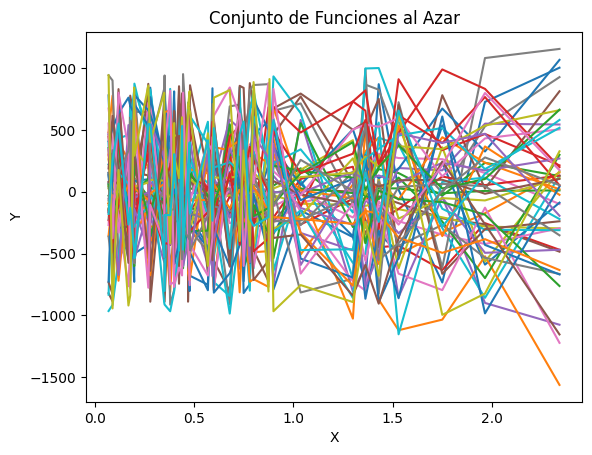

In [3]:
# Conjunto funciones

def generar_funcion_azar(x):
    a = np.random.uniform(-1000, 1000)
    b = np.random.uniform(-1000, 1000)
    c = np.random.uniform(-1000, 1000)
    print(a, b, c)
    
    funcion = a * np.sin(b * x) + c * np.exp(-0.5 * (x - 3)**2) + 0.5 * x**2
    
    return funcion

num_funciones = 50
conjunto_funciones = np.array([generar_funcion_azar(z) for _ in range(num_funciones)])

for i, funcion in enumerate(conjunto_funciones):
    plt.plot(z, funcion, label=f'Función {i + 1}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Funciones al Azar')
plt.show()


42


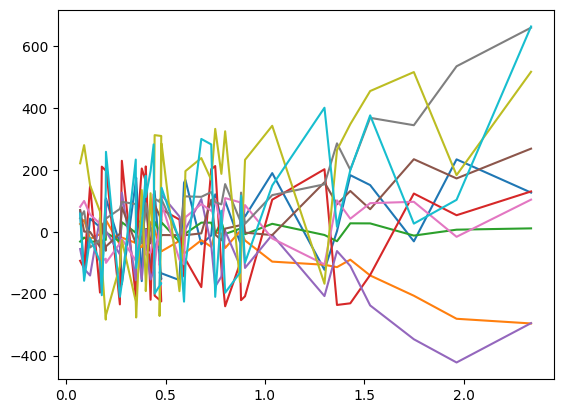

In [4]:
chi = np.zeros(len(conjunto_funciones))

for i in range(len(conjunto_funciones)): 
    funcion = conjunto_funciones[i]
    chi[i] = np.sum(((H - funcion) / desv)**2)

percentil_20 = np.percentile(chi, 20)

chi_menor_20 = [num for num in chi if num <= percentil_20]
indices_menor_20 = np.where(np.array(chi) <= percentil_20)[0]
print(max(indices_menor_20))


primeras_funciones = conjunto_funciones[indices_menor_20.tolist()]
for i, funcion in enumerate(primeras_funciones):
    plt.plot(z, funcion, label=f'Función {i + 1}')



0
1
2
3
4
5
6
7
8
9
10


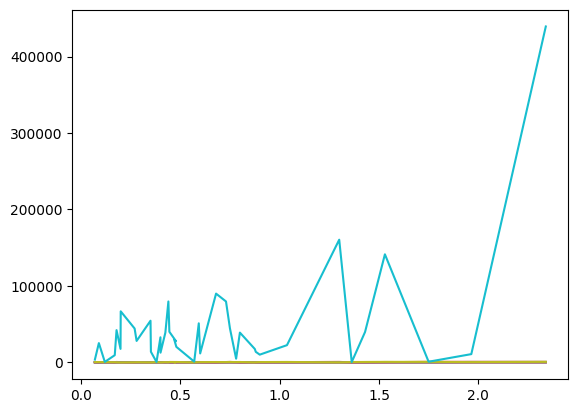

In [5]:
# Se define combinacion

def combinar_al_azar(F):
    Combinacion = np.zeros_like(F)
    for i in range(0, len(F)): 
        rand = np.random.rand()
        indice = random.randint(0, len(F))
        print(i)

        if rand < 0.25:
            Combinacion[i] = F[i] + F[indice]
        elif 0.25< rand < 0.5:
            Combinacion[i] = (F[i] * F[indice])
        elif 0.5  < rand < 0.75:
            Combinacion[i] = (F[i] - F[indice])
        else:
            Combinacion[i] = (F[i]/F[indice])
    return Combinacion
    
# Se combinan funciones pre-existentes

combinacion = combinar_al_azar(primeras_funciones)
print(len(combinacion))

for i, funcion in enumerate(combinacion):
    plt.plot(z, funcion, label=f'Función {i + 1}')

In [10]:
# Se define mutacion


tamanio_nueva_lista = int(len(combinacion) * 0.1)

# Crear una nueva lista con el 10% de los elementos al azar
percentil_10 = random.sample(combinacion.tolist(), tamanio_nueva_lista)

print(percentil_10)

def mutar_al_azar(F):
    Mutacion = np.zeros_like(F)
    for i in range(0, len(F)): 
        rand = np.random.rand()
        exponencial = np.random.rand()
        A = np.random.rand()

        
        if rand < 0.25:
            Mutacion[i] = A*F[i]**exponencial
        elif 0.25< rand < 0.5:
            Mutacion[i] = A*np.log(F[i])
        elif 0.5  < rand < 0.75:
            Mutacion[i] = A*np.sin(F[i])
        else:
            Mutacion[i] = A*np.cos(F[i])
    return Mutacion



[[-2.176155541408276, 7.490376407856949, -1.3349783013092502, -0.46806192398933166, -14.125954318292099, -3.3416882614705745, -57.27802907725155, 1.2526245818413604, -5.50226154511324, -48.99403290824768, 5.2243653550273255, -4.916422396132303, -45.70197729520234, 22.07685188360016, -12.528677549043842, -2.3508174372128563, 3.968398901465747, 12.667567816479636, 4.040825350670195, -4.460384519566498, 4.820996331129875, -120.56075279436043, -30.356650289816102, -1.3734472884074465, -0.40164902810564035, -17.890321926501144, 1.2313680425269147, -13.841459261982648, -3.453779106349309, 2.6214986902835054, -6.2264398392485845, 7.388143237251253, 11.740367268199371, -0.054457364887842835, 6.7176005266186545, 5.589871089017201, 2.4986975807721983, 34.987696813525886, 11.58567226993806]]


In [11]:
from deap import base, creator, tools, algorithms


In [12]:
import random

from deap import base, creator, tools

# Crear un tipo de individuo llamado "Individual"
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Definir funciones de inicialización y mutación
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Definir la función de evaluación (fitness)
def eval_func(individual):
    return sum(individual),

# Registrar funciones y operadores genéticos
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Crear una población inicial
population = toolbox.population(n=50)

# Evaluar la población
fitnesses = list(map(toolbox.evaluate, population))
for ind, fit in zip(population, fitnesses):
    ind.fitness.values = fit

# Ejecutar el algoritmo genético
NGEN = 100
CXPB, MUTPB = 0.7, 0.2
algorithms.eaMuPlusLambda(population, toolbox, mu=50, lambda_=100, cxpb=CXPB, mutpb=MUTPB, ngen=NGEN, stats=None, halloffame=None, verbose=True)

# Obtener el mejor individuo al final de la evolución
best_ind = tools.selBest(population, k=1)[0]
print("Mejor individuo:", best_ind)
print("Fitness del mejor individuo:", best_ind.fitness.values)


gen	nevals
0  	0     
1  	93    
2  	81    
3  	92    
4  	91    
5  	93    
6  	88    
7  	87    
8  	90    
9  	95    
10 	85    
11 	88    
12 	93    
13 	93    
14 	93    
15 	86    
16 	92    
17 	86    
18 	91    
19 	92    
20 	93    
21 	93    
22 	92    
23 	89    
24 	97    
25 	89    
26 	92    
27 	99    
28 	91    
29 	91    
30 	92    
31 	89    
32 	87    
33 	93    
34 	87    
35 	87    
36 	89    
37 	89    
38 	90    
39 	93    
40 	91    
41 	90    
42 	88    
43 	96    
44 	91    
45 	90    
46 	90    
47 	85    
48 	89    
49 	90    
50 	89    
51 	88    
52 	92    
53 	91    
54 	90    
55 	93    
56 	95    
57 	90    
58 	85    
59 	87    
60 	85    
61 	92    
62 	91    
63 	89    
64 	84    
65 	92    
66 	88    
67 	91    
68 	90    
69 	91    
70 	88    
71 	87    
72 	83    
73 	88    
74 	89    
75 	85    
76 	95    
77 	91    
78 	92    
79 	91    
80 	91    
81 	88    
82 	91    
83 	88    
84 	84    
85 	89    
86 	89    
87 	89    
88 	91    
89 	87    

In [13]:
x = np.linspace(-20, 20, 100)

def f(x):
    return (x**2 + x)*np.cos(2*x) + x**2

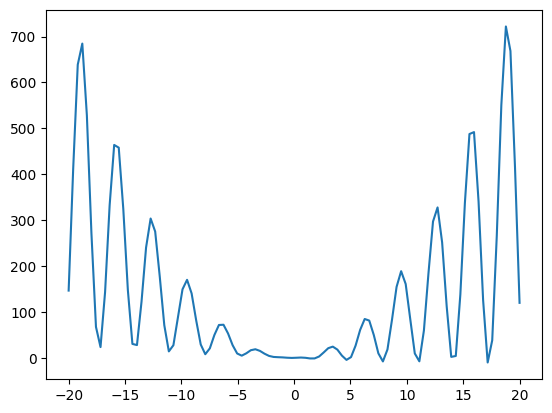

In [14]:
plt.plot(x, f(x))